## Przykłady dotyczące pliku employees.csv

In [1]:
import pandas
%matplotlib inline

### Wczytanie danych z pliku CSV
Podobnie można wczytać dane z wielu innych źródeł: plików Excela, XML, JSON, baz danych...

In [2]:
emps = pandas.read_csv('pracownicy_z_naglowkiem.csv',
                       delimiter=';',
                       encoding='utf-8',   # w polskim Excelu raczej windows-1250
                       index_col='employee_id',
                       parse_dates=['hire_date'])

In [3]:
emps

first_name last_name                        job_title  salary  \
employee_id                                                                 
100             Steven      King                        President   24000   
101              Neena   Kochhar    Administration Vice President   17000   
102                Lex   De Haan    Administration Vice President   17000   
103          Alexander    Hunold                       Programmer    9000   
104              Bruce     Ernst                       Programmer    6000   
...                ...       ...                              ...     ...   
202                Pat       Fay         Marketing Representative    6000   
203              Susan    Mavris   Human Resources Representative    6500   
204            Hermann      Baer  Public Relations Representative   10000   
205            Shelley   Higgins               Accounting Manager   12000   
206            William     Gietz                Public Accountant    8300   

             hire_date   department_name                address postal_code  \
employee_id                                                                   
100         1987-06-17         Executive        2004 Charade Rd       98199   
101         1989-09-21         Executive        2004 Charade Rd       98199   
102         1993-01-13         Executive        2004 Charade Rd       98199   
103         1990-01-03                IT    2014 Jabberwocky Rd       26192   
104         1991-05-21                IT    2014 Jabberwocky Rd       26192   
...                ...               ...                    ...         ...   
202         1997-08-17         Marketing        147 Spadina Ave     M5V 2L7   
203         1994-06-07   Human Resources         8204 Arthur St         NaN   
204         1994-06-07  Public Relations  Schwanthalerstr. 7031       80925   
205         1994-06-07        Accounting        2004 Charade Rd       98199   
206         1994-06-07        Accounting        2004 Charade Rd       98199   

                  city                   country  
employee_id                                       
100            Seattle  United States of America  
101            Seattle  United States of America  
102            Seattle  United States of America  
103          Southlake  United States of America  
104          Southlake  United States of America  
...                ...                       ...  
202            Toronto                    Canada  
203             London            United Kingdom  
204             Munich                   Germany  
205            Seattle  United States of America  
206            Seattle  United States of America  

[107 rows x 10 columns]

### Wybór kolumn i wierszy

In [4]:
emps['last_name']

employee_id
100       King
101    Kochhar
102    De Haan
103     Hunold
104      Ernst
        ...   
202        Fay
203     Mavris
204       Baer
205    Higgins
206      Gietz
Name: last_name, Length: 107, dtype: object

In [5]:
emps.salary

employee_id
100    24000
101    17000
102    17000
103     9000
104     6000
       ...  
202     6000
203     6500
204    10000
205    12000
206     8300
Name: salary, Length: 107, dtype: int64

## Wybieranie wiersza

Na dwa zasadnicze sposoby:
- **iloc** - wybór wg pozycji liczonej od 0
- **loc** - wybór według "biznesowych" indeksów i etykiet

### Przykłady iloc
Wybór wiersza i ewentualnie także kolumny po numerze (numeracja od 0)

In [6]:
emps.iloc[0]

first_name                           Steven
last_name                              King
job_title                         President
salary                                24000
hire_date               1987-06-17 00:00:00
department_name                   Executive
address                     2004 Charade Rd
postal_code                           98199
city                                Seattle
country            United States of America
Name: 100, dtype: object

In [7]:
emps.iloc[0].first_name, emps.iloc[0].salary

('Steven', 24000)

In [8]:
emps.iloc[0]['first_name'], emps.iloc[0]['salary']

('Steven', 24000)

In [9]:
emps.iloc[1,2]

'Administration Vice President'

In [10]:
#ERR emps.iloc[1, 'salary']

In [11]:
emps.iloc[1,0:4]

first_name                            Neena
last_name                           Kochhar
job_title     Administration Vice President
salary                                17000
Name: 101, dtype: object

In [12]:
emps.iloc[5,2], emps.iloc[5,4], emps.iloc[5,4].month

('Programmer', Timestamp('1997-06-25 00:00:00'), 6)

In [13]:
emps.iloc[2:10]

first_name  last_name                      job_title  salary  \
employee_id                                                                
102                Lex    De Haan  Administration Vice President   17000   
103          Alexander     Hunold                     Programmer    9000   
104              Bruce      Ernst                     Programmer    6000   
105              David     Austin                     Programmer    4800   
106              Valli  Pataballa                     Programmer    4800   
107              Diana    Lorentz                     Programmer    4200   
108              Nancy  Greenberg                Finance Manager   12000   
109             Daniel     Faviet                     Accountant    9000   

             hire_date department_name              address postal_code  \
employee_id                                                               
102         1993-01-13       Executive      2004 Charade Rd       98199   
103         1990-01-03              IT  2014 Jabberwocky Rd       26192   
104         1991-05-21              IT  2014 Jabberwocky Rd       26192   
105         1997-06-25              IT  2014 Jabberwocky Rd       26192   
106         1998-02-05              IT  2014 Jabberwocky Rd       26192   
107         1999-02-07              IT  2014 Jabberwocky Rd       26192   
108         1994-08-17         Finance      2004 Charade Rd       98199   
109         1994-08-16         Finance      2004 Charade Rd       98199   

                  city                   country  
employee_id                                       
102            Seattle  United States of America  
103          Southlake  United States of America  
104          Southlake  United States of America  
105          Southlake  United States of America  
106          Southlake  United States of America  
107          Southlake  United States of America  
108            Seattle  United States of America  
109            Seattle  United States of America

In [14]:
emps.iloc[2:10, 1]

employee_id
102      De Haan
103       Hunold
104        Ernst
105       Austin
106    Pataballa
107      Lorentz
108    Greenberg
109       Faviet
Name: last_name, dtype: object

In [15]:
emps.iloc[2:10, 0:3]

first_name  last_name                      job_title
employee_id                                                     
102                Lex    De Haan  Administration Vice President
103          Alexander     Hunold                     Programmer
104              Bruce      Ernst                     Programmer
105              David     Austin                     Programmer
106              Valli  Pataballa                     Programmer
107              Diana    Lorentz                     Programmer
108              Nancy  Greenberg                Finance Manager
109             Daniel     Faviet                     Accountant

In [16]:
emps.iloc[2:10, [0, 1, 3]]

first_name  last_name  salary
employee_id                              
102                Lex    De Haan   17000
103          Alexander     Hunold    9000
104              Bruce      Ernst    6000
105              David     Austin    4800
106              Valli  Pataballa    4800
107              Diana    Lorentz    4200
108              Nancy  Greenberg   12000
109             Daniel     Faviet    9000

In [17]:
emps.iloc[50:, [0, 1, 3]]

first_name   last_name  salary
employee_id                                 
150                Peter      Tucker   10000
151                David   Bernstein    9500
152                Peter        Hall    9000
153          Christopher       Olsen    8000
154              Nanette   Cambrault    7500
155               Oliver     Tuvault    7000
156              Janette        King   10000
157              Patrick       Sully    9500
158                Allan      McEwen    9000
159              Lindsey       Smith    8000
160               Louise       Doran    7500
161               Sarath      Sewall    7000
162                Clara     Vishney   10500
163             Danielle      Greene    9500
164               Mattea     Marvins    7200
165                David         Lee    6800
166               Sundar        Ande    6400
167                 Amit       Banda    6200
168                 Lisa        Ozer   11500
169             Harrison       Bloom   10000
170               Tayler         Fox    9600
171              William       Smith    7400
172            Elizabeth       Bates    7300
173              Sundita       Kumar    6100
174                Ellen        Abel   11000
175               Alyssa      Hutton    8800
176             Jonathon      Taylor    8600
177                 Jack  Livingston    8400
178            Kimberely       Grant    7000
179              Charles     Johnson    6200
180              Winston      Taylor    3200
181                 Jean      Fleaur    3100
182               Martha    Sullivan    2500
183               Girard       Geoni    2800
184              Nandita    Sarchand    4200
185               Alexis        Bull    4100
186                Julia   Dellinger    3400
187              Anthony      Cabrio    3000
188                Kelly       Chung    3800
189             Jennifer       Dilly    3600
190              Timothy       Gates    2900
191              Randall     Perkins    2500
192                Sarah        Bell    4000
193              Britney     Everett    3900
194               Samuel      McCain    3200
195                Vance       Jones    2800
196                Alana       Walsh    3100
197                Kevin      Feeney    3000
198               Donald    OConnell    2600
199              Douglas       Grant    2600
200             Jennifer      Whalen    4400
201              Michael   Hartstein   13000
202                  Pat         Fay    6000
203                Susan      Mavris    6500
204              Hermann        Baer   10000
205              Shelley     Higgins   12000
206              William       Gietz    8300

In [18]:
emps.iloc[:, [0, 1, 3]]

first_name last_name  salary
employee_id                             
100             Steven      King   24000
101              Neena   Kochhar   17000
102                Lex   De Haan   17000
103          Alexander    Hunold    9000
104              Bruce     Ernst    6000
...                ...       ...     ...
202                Pat       Fay    6000
203              Susan    Mavris    6500
204            Hermann      Baer   10000
205            Shelley   Higgins   12000
206            William     Gietz    8300

[107 rows x 3 columns]

### Przykłady loc
Wybór wiersza (rekordu) wedłu jego indeksu (w tym przypadku employee_id)

In [19]:
emps.loc[100]

first_name                           Steven
last_name                              King
job_title                         President
salary                                24000
hire_date               1987-06-17 00:00:00
department_name                   Executive
address                     2004 Charade Rd
postal_code                           98199
city                                Seattle
country            United States of America
Name: 100, dtype: object

In [20]:
emps.loc[101, 'salary']

17000

In [21]:
#ERR emps.loc[101, 6]

In [22]:
emps.loc[101:105, 'salary']

employee_id
101    17000
102    17000
103     9000
104     6000
105     4800
Name: salary, dtype: int64

In [23]:
emps.loc[101:105, ('first_name', 'last_name', 'salary')]

first_name last_name  salary
employee_id                             
101              Neena   Kochhar   17000
102                Lex   De Haan   17000
103          Alexander    Hunold    9000
104              Bruce     Ernst    6000
105              David    Austin    4800

### Filtrowanie / warunki logiczne

In [24]:
emps[ emps.job_title == 'Programmer']

first_name  last_name   job_title  salary  hire_date  \
employee_id                                                        
103          Alexander     Hunold  Programmer    9000 1990-01-03   
104              Bruce      Ernst  Programmer    6000 1991-05-21   
105              David     Austin  Programmer    4800 1997-06-25   
106              Valli  Pataballa  Programmer    4800 1998-02-05   
107              Diana    Lorentz  Programmer    4200 1999-02-07   

            department_name              address postal_code       city  \
employee_id                                                               
103                      IT  2014 Jabberwocky Rd       26192  Southlake   
104                      IT  2014 Jabberwocky Rd       26192  Southlake   
105                      IT  2014 Jabberwocky Rd       26192  Southlake   
106                      IT  2014 Jabberwocky Rd       26192  Southlake   
107                      IT  2014 Jabberwocky Rd       26192  Southlake   

                              country  
employee_id                            
103          United States of America  
104          United States of America  
105          United States of America  
106          United States of America  
107          United States of America

In [25]:
emps[emps['salary'] >= 10000]

first_name  last_name                        job_title  salary  \
employee_id                                                                  
100             Steven       King                        President   24000   
101              Neena    Kochhar    Administration Vice President   17000   
102                Lex    De Haan    Administration Vice President   17000   
108              Nancy  Greenberg                  Finance Manager   12000   
114                Den   Raphaely               Purchasing Manager   11000   
145               John    Russell                    Sales Manager   14000   
146              Karen   Partners                    Sales Manager   13500   
147            Alberto  Errazuriz                    Sales Manager   12000   
148             Gerald  Cambrault                    Sales Manager   11000   
149              Eleni    Zlotkey                    Sales Manager   10500   
150              Peter     Tucker             Sales Representative   10000   
156            Janette       King             Sales Representative   10000   
162              Clara    Vishney             Sales Representative   10500   
168               Lisa       Ozer             Sales Representative   11500   
169           Harrison      Bloom             Sales Representative   10000   
174              Ellen       Abel             Sales Representative   11000   
201            Michael  Hartstein                Marketing Manager   13000   
204            Hermann       Baer  Public Relations Representative   10000   
205            Shelley    Higgins               Accounting Manager   12000   

             hire_date   department_name  \
employee_id                                
100         1987-06-17         Executive   
101         1989-09-21         Executive   
102         1993-01-13         Executive   
108         1994-08-17           Finance   
114         1994-12-07        Purchasing   
145         1996-10-01             Sales   
146         1997-01-05             Sales   
147         1997-03-10             Sales   
148         1999-10-15             Sales   
149         2000-01-29             Sales   
150         1997-01-30             Sales   
156         1996-01-30             Sales   
162         1997-11-11             Sales   
168         1997-03-11             Sales   
169         1998-03-23             Sales   
174         1996-05-11             Sales   
201         1996-02-17         Marketing   
204         1994-06-07  Public Relations   
205         1994-06-07        Accounting   

                                              address postal_code     city  \
employee_id                                                                  
100                                   2004 Charade Rd       98199  Seattle   
101                                   2004 Charade Rd       98199  Seattle   
102                                   2004 Charade Rd       98199  Seattle   
108                                   2004 Charade Rd       98199  Seattle   
114                                   2004 Charade Rd       98199  Seattle   
145          Magdalen Centre, The Oxford Science Park     OX9 9ZB   Oxford   
146          Magdalen Centre, The Oxford Science Park     OX9 9ZB   Oxford   
147          Magdalen Centre, The Oxford Science Park     OX9 9ZB   Oxford   
148          Magdalen Centre, The Oxford Science Park     OX9 9ZB   Oxford   
149          Magdalen Centre, The Oxford Science Park     OX9 9ZB   Oxford   
150          Magdalen Centre, The Oxford Science Park     OX9 9ZB   Oxford   
156          Magdalen Centre, The Oxford Science Park     OX9 9ZB   Oxford   
162          Magdalen Centre, The Oxford Science Park     OX9 9ZB   Oxford   
168          Magdalen Centre, The Oxford Science Park     OX9 9ZB   Oxford   
169          Magdalen Centre, The Oxford Science Park     OX9 9ZB   Oxford   
174          Magdalen Centre, The Oxford Science Park     OX9 9ZB   Oxford   
201                                   147 Sp

In [26]:
# Wyjaśnienie jak to działa
# Samo emps.salary to jest Series
emps.salary

employee_id
100    24000
101    17000
102    17000
103     9000
104     6000
       ...  
202     6000
203     6500
204    10000
205    12000
206     8300
Name: salary, Length: 107, dtype: int64

In [27]:
# Jeśli dla takie serii zastosujemy operator >=, to wynikiem nie będzie pojedyczny bool
# tylko seria wartości bool (True/False)
emps.salary >= 10000

employee_id
100     True
101     True
102     True
103    False
104    False
       ...  
202    False
203    False
204     True
205     True
206    False
Name: salary, Length: 107, dtype: bool

In [28]:
# I teraz użycie tego warunku w nawiasach kwadratorych DataFrame powoduje wybranie tylko tych rekordów, które spełniają warunek
emps[emps.salary >= 10000]

first_name  last_name                        job_title  salary  \
employee_id                                                                  
100             Steven       King                        President   24000   
101              Neena    Kochhar    Administration Vice President   17000   
102                Lex    De Haan    Administration Vice President   17000   
108              Nancy  Greenberg                  Finance Manager   12000   
114                Den   Raphaely               Purchasing Manager   11000   
145               John    Russell                    Sales Manager   14000   
146              Karen   Partners                    Sales Manager   13500   
147            Alberto  Errazuriz                    Sales Manager   12000   
148             Gerald  Cambrault                    Sales Manager   11000   
149              Eleni    Zlotkey                    Sales Manager   10500   
150              Peter     Tucker             Sales Representative   10000   
156            Janette       King             Sales Representative   10000   
162              Clara    Vishney             Sales Representative   10500   
168               Lisa       Ozer             Sales Representative   11500   
169           Harrison      Bloom             Sales Representative   10000   
174              Ellen       Abel             Sales Representative   11000   
201            Michael  Hartstein                Marketing Manager   13000   
204            Hermann       Baer  Public Relations Representative   10000   
205            Shelley    Higgins               Accounting Manager   12000   

             hire_date   department_name  \
employee_id                                
100         1987-06-17         Executive   
101         1989-09-21         Executive   
102         1993-01-13         Executive   
108         1994-08-17           Finance   
114         1994-12-07        Purchasing   
145         1996-10-01             Sales   
146         1997-01-05             Sales   
147         1997-03-10             Sales   
148         1999-10-15             Sales   
149         2000-01-29             Sales   
150         1997-01-30             Sales   
156         1996-01-30             Sales   
162         1997-11-11             Sales   
168         1997-03-11             Sales   
169         1998-03-23             Sales   
174         1996-05-11             Sales   
201         1996-02-17         Marketing   
204         1994-06-07  Public Relations   
205         1994-06-07        Accounting   

                                              address postal_code     city  \
employee_id                                                                  
100                                   2004 Charade Rd       98199  Seattle   
101                                   2004 Charade Rd       98199  Seattle   
102                                   2004 Charade Rd       98199  Seattle   
108                                   2004 Charade Rd       98199  Seattle   
114                                   2004 Charade Rd       98199  Seattle   
145          Magdalen Centre, The Oxford Science Park     OX9 9ZB   Oxford   
146          Magdalen Centre, The Oxford Science Park     OX9 9ZB   Oxford   
147          Magdalen Centre, The Oxford Science Park     OX9 9ZB   Oxford   
148          Magdalen Centre, The Oxford Science Park     OX9 9ZB   Oxford   
149          Magdalen Centre, The Oxford Science Park     OX9 9ZB   Oxford   
150          Magdalen Centre, The Oxford Science Park     OX9 9ZB   Oxford   
156          Magdalen Centre, The Oxford Science Park     OX9 9ZB   Oxford   
162          Magdalen Centre, The Oxford Science Park     OX9 9ZB   Oxford   
168          Magdalen Centre, The Oxford Science Park     OX9 9ZB   Oxford   
169          Magdalen Centre, The Oxford Science Park     OX9 9ZB   Oxford   
174          Magdalen Centre, The Oxford Science Park     OX9 9ZB   Oxford   
201                                   147 Sp

In [29]:
emps[emps.salary >= 10000].iloc[:5]

first_name  last_name                      job_title  salary  \
employee_id                                                                
100             Steven       King                      President   24000   
101              Neena    Kochhar  Administration Vice President   17000   
102                Lex    De Haan  Administration Vice President   17000   
108              Nancy  Greenberg                Finance Manager   12000   
114                Den   Raphaely             Purchasing Manager   11000   

             hire_date department_name          address postal_code     city  \
employee_id                                                                    
100         1987-06-17       Executive  2004 Charade Rd       98199  Seattle   
101         1989-09-21       Executive  2004 Charade Rd       98199  Seattle   
102         1993-01-13       Executive  2004 Charade Rd       98199  Seattle   
108         1994-08-17         Finance  2004 Charade Rd       98199  Seattle   
114         1994-12-07      Purchasing  2004 Charade Rd       98199  Seattle   

                              country  
employee_id                            
100          United States of America  
101          United States of America  
102          United States of America  
108          United States of America  
114          United States of America

In [30]:
# łączenie warunków logicznych - za pomocą & i |
emps[(emps.salary >= 5000) & (emps.job_title == 'Programmer')]

first_name last_name   job_title  salary  hire_date  \
employee_id                                                       
103          Alexander    Hunold  Programmer    9000 1990-01-03   
104              Bruce     Ernst  Programmer    6000 1991-05-21   

            department_name              address postal_code       city  \
employee_id                                                               
103                      IT  2014 Jabberwocky Rd       26192  Southlake   
104                      IT  2014 Jabberwocky Rd       26192  Southlake   

                              country  
employee_id                            
103          United States of America  
104          United States of America

In [31]:
# Same "warunki" dot. kolumn wyliczają się do "serii" wartości True/False
# A operatory & i | odpowiednio te wyniki składają - tak to działa.
(emps.salary >= 5000)

employee_id
100    True
101    True
102    True
103    True
104    True
       ... 
202    True
203    True
204    True
205    True
206    True
Name: salary, Length: 107, dtype: bool

In [32]:
(emps.salary >= 5000) & (emps.job_title == 'Programmer')

employee_id
100    False
101    False
102    False
103     True
104     True
       ...  
202    False
203    False
204    False
205    False
206    False
Length: 107, dtype: bool

In [33]:
warunek1 = emps.salary >= 5000
warunek2 = emps.job_title == 'Programmer'
emps[warunek1 & warunek2]

first_name last_name   job_title  salary  hire_date  \
employee_id                                                       
103          Alexander    Hunold  Programmer    9000 1990-01-03   
104              Bruce     Ernst  Programmer    6000 1991-05-21   

            department_name              address postal_code       city  \
employee_id                                                               
103                      IT  2014 Jabberwocky Rd       26192  Southlake   
104                      IT  2014 Jabberwocky Rd       26192  Southlake   

                              country  
employee_id                            
103          United States of America  
104          United States of America

In [34]:
emps[(emps.salary >= 3000) & ((emps.job_title == 'Stock Clerk') | (emps.job_title == 'Stock Manager'))]

first_name last_name      job_title  salary  hire_date  \
employee_id                                                          
120            Matthew     Weiss  Stock Manager    8000 1996-07-18   
121               Adam     Fripp  Stock Manager    8200 1997-04-10   
122              Payam  Kaufling  Stock Manager    7900 1995-05-01   
123             Shanta   Vollman  Stock Manager    6500 1997-10-10   
124              Kevin   Mourgos  Stock Manager    5800 1999-11-16   
125              Julia     Nayer    Stock Clerk    3200 1997-07-16   
129              Laura    Bissot    Stock Clerk    3300 1997-08-20   
133              Jason    Mallin    Stock Clerk    3300 1996-06-14   
137             Renske    Ladwig    Stock Clerk    3600 1995-07-14   
138            Stephen    Stiles    Stock Clerk    3200 1997-10-26   
141             Trenna      Rajs    Stock Clerk    3500 1995-10-17   
142             Curtis    Davies    Stock Clerk    3100 1997-01-29   

            department_name              address postal_code  \
employee_id                                                    
120                Shipping  2011 Interiors Blvd       99236   
121                Shipping  2011 Interiors Blvd       99236   
122                Shipping  2011 Interiors Blvd       99236   
123                Shipping  2011 Interiors Blvd       99236   
124                Shipping  2011 Interiors Blvd       99236   
125                Shipping  2011 Interiors Blvd       99236   
129                Shipping  2011 Interiors Blvd       99236   
133                Shipping  2011 Interiors Blvd       99236   
137                Shipping  2011 Interiors Blvd       99236   
138                Shipping  2011 Interiors Blvd       99236   
141                Shipping  2011 Interiors Blvd       99236   
142                Shipping  2011 Interiors Blvd       99236   

                            city                   country  
employee_id                                                 
120          South San Francisco  United States of America  
121          South San Francisco  United States of America  
122          South San Francisco  United States of America  
123          South San Francisco  United States of America  
124          South San Francisco  United States of America  
125          South San Francisco  United States of America  
129          South San Francisco  United States of America  
133          South San Francisco  United States of America  
137          South San Francisco  United States of America  
138          South San Francisco  United States of America  
141          South San Francisco  United States of America  
142          South San Francisco  United States of America

In [35]:
emps[emps.job_title.isin(['Stock Clerk', 'Stock Manager'])]

first_name    last_name      job_title  salary  hire_date  \
employee_id                                                             
120            Matthew        Weiss  Stock Manager    8000 1996-07-18   
121               Adam        Fripp  Stock Manager    8200 1997-04-10   
122              Payam     Kaufling  Stock Manager    7900 1995-05-01   
123             Shanta      Vollman  Stock Manager    6500 1997-10-10   
124              Kevin      Mourgos  Stock Manager    5800 1999-11-16   
125              Julia        Nayer    Stock Clerk    3200 1997-07-16   
126              Irene  Mikkilineni    Stock Clerk    2700 1998-09-28   
127              James       Landry    Stock Clerk    2400 1999-01-14   
128             Steven       Markle    Stock Clerk    2200 2000-03-08   
129              Laura       Bissot    Stock Clerk    3300 1997-08-20   
130              Mozhe     Atkinson    Stock Clerk    2800 1997-10-30   
131              James       Marlow    Stock Clerk    2500 1997-02-16   
132                 TJ        Olson    Stock Clerk    2100 1999-04-10   
133              Jason       Mallin    Stock Clerk    3300 1996-06-14   
134            Michael       Rogers    Stock Clerk    2900 1998-08-26   
135                 Ki          Gee    Stock Clerk    2400 1999-12-12   
136              Hazel   Philtanker    Stock Clerk    2200 2000-02-06   
137             Renske       Ladwig    Stock Clerk    3600 1995-07-14   
138            Stephen       Stiles    Stock Clerk    3200 1997-10-26   
139               John          Seo    Stock Clerk    2700 1998-02-12   
140             Joshua        Patel    Stock Clerk    2500 1998-04-06   
141             Trenna         Rajs    Stock Clerk    3500 1995-10-17   
142             Curtis       Davies    Stock Clerk    3100 1997-01-29   
143            Randall        Matos    Stock Clerk    2600 1998-03-15   
144              Peter       Vargas    Stock Clerk    2500 1998-07-09   

            department_name              address postal_code  \
employee_id                                                    
120                Shipping  2011 Interiors Blvd       99236   
121                Shipping  2011 Interiors Blvd       99236   
122                Shipping  2011 Interiors Blvd       99236   
123                Shipping  2011 Interiors Blvd       99236   
124                Shipping  2011 Interiors Blvd       99236   
125                Shipping  2011 Interiors Blvd       99236   
126                Shipping  2011 Interiors Blvd       99236   
127                Shipping  2011 Interiors Blvd       99236   
128                Shipping  2011 Interiors Blvd       99236   
129                Shipping  2011 Interiors Blvd       99236   
130                Shipping  2011 Interiors Blvd       99236   
131                Shipping  2011 Interiors Blvd       99236   
132                Shipping  2011 Interiors Blvd       99236   
133                Shipping  2011 Interiors Blvd       99236   
134                Shipping  2011 Interiors Blvd       99236   
135                Shipping  2011 Interiors Blvd       99236   
136                Shipping  2011 Interiors Blvd       99236   
137                Shipping  2011 Interiors Blvd       99236   
138                Shipping  2011 Interiors Blvd       99236   
139                Shipping  2011 Interiors Blvd       99236   
140                Shipping  2011 Interiors Blvd       99236   
141                Shipping  2011 Interiors Blvd       99236   
142                Shipping  2011 Interiors Blvd       99236   
143                Shipping  2011 Interiors Blvd       99236   
144                Shipping  2011 Interiors Blvd       99236   

                            city                   country  
employee_id                                                 
120          South San Francisco  United States of America  
121          South San Francisco  United States of America  
122          South San Francisco  United States of America  
123   

Aby skorzystać z funkcjonalności daty i czasu **w kolumnie**, należy odwołując się do niej dopisać .dt

In [36]:
emps.hire_date

employee_id
100   1987-06-17
101   1989-09-21
102   1993-01-13
103   1990-01-03
104   1991-05-21
         ...    
202   1997-08-17
203   1994-06-07
204   1994-06-07
205   1994-06-07
206   1994-06-07
Name: hire_date, Length: 107, dtype: datetime64[ns]

In [37]:
#ERR emps.hire_date.month
emps.hire_date.dt.month

employee_id
100    6
101    9
102    1
103    1
104    5
      ..
202    8
203    6
204    6
205    6
206    6
Name: hire_date, Length: 107, dtype: int64

In [38]:
# Druga połowa 1994 roku
emps[(emps.hire_date.dt.year == 1994) & (emps.hire_date.dt.month >= 7)]

first_name  last_name           job_title  salary  hire_date  \
employee_id                                                                
108              Nancy  Greenberg     Finance Manager   12000 1994-08-17   
109             Daniel     Faviet          Accountant    9000 1994-08-16   
114                Den   Raphaely  Purchasing Manager   11000 1994-12-07   

            department_name          address postal_code     city  \
employee_id                                                         
108                 Finance  2004 Charade Rd       98199  Seattle   
109                 Finance  2004 Charade Rd       98199  Seattle   
114              Purchasing  2004 Charade Rd       98199  Seattle   

                              country  
employee_id                            
108          United States of America  
109          United States of America  
114          United States of America

## Modyfikacja

In [39]:
# Zasadniczo DataFrame-y są modyfikowalne
emps.loc[100, 'first_name'] = 'Stefan'
emps.loc[100, 'salary'] += 5
emps.loc[100]

first_name                           Stefan
last_name                              King
job_title                         President
salary                                24005
hire_date               1987-06-17 00:00:00
department_name                   Executive
address                     2004 Charade Rd
postal_code                           98199
city                                Seattle
country            United States of America
Name: 100, dtype: object

In [40]:
# W szczególności do tabeli można dodać nową kolumnę (lub zastapić, jeśli już istniała)
emps['podatek'] = 0.2 * emps.salary

In [41]:
emps

first_name last_name                        job_title  salary  \
employee_id                                                                 
100             Stefan      King                        President   24005   
101              Neena   Kochhar    Administration Vice President   17000   
102                Lex   De Haan    Administration Vice President   17000   
103          Alexander    Hunold                       Programmer    9000   
104              Bruce     Ernst                       Programmer    6000   
...                ...       ...                              ...     ...   
202                Pat       Fay         Marketing Representative    6000   
203              Susan    Mavris   Human Resources Representative    6500   
204            Hermann      Baer  Public Relations Representative   10000   
205            Shelley   Higgins               Accounting Manager   12000   
206            William     Gietz                Public Accountant    8300   

             hire_date   department_name                address postal_code  \
employee_id                                                                   
100         1987-06-17         Executive        2004 Charade Rd       98199   
101         1989-09-21         Executive        2004 Charade Rd       98199   
102         1993-01-13         Executive        2004 Charade Rd       98199   
103         1990-01-03                IT    2014 Jabberwocky Rd       26192   
104         1991-05-21                IT    2014 Jabberwocky Rd       26192   
...                ...               ...                    ...         ...   
202         1997-08-17         Marketing        147 Spadina Ave     M5V 2L7   
203         1994-06-07   Human Resources         8204 Arthur St         NaN   
204         1994-06-07  Public Relations  Schwanthalerstr. 7031       80925   
205         1994-06-07        Accounting        2004 Charade Rd       98199   
206         1994-06-07        Accounting        2004 Charade Rd       98199   

                  city                   country  podatek  
employee_id                                                
100            Seattle  United States of America   4801.0  
101            Seattle  United States of America   3400.0  
102            Seattle  United States of America   3400.0  
103          Southlake  United States of America   1800.0  
104          Southlake  United States of America   1200.0  
...                ...                       ...      ...  
202            Toronto                    Canada   1200.0  
203             London            United Kingdom   1300.0  
204             Munich                   Germany   2000.0  
205            Seattle  United States of America   2400.0  
206            Seattle  United States of America   1660.0  

[107 rows x 11 columns]

In [42]:
# Czasami do wyliczenia wartości musimy użyć bardzie złożonej logiki - wtedy stosujemy apply

def jaki_status(zarobki):
    if zarobki < 5000:
        return 'biedny'
    elif zarobki < 15000:
        return 'spoko'
    else:
        return 'bogacz'

emps['status'] = emps.salary.apply(jaki_status)

In [43]:
emps

first_name last_name                        job_title  salary  \
employee_id                                                                 
100             Stefan      King                        President   24005   
101              Neena   Kochhar    Administration Vice President   17000   
102                Lex   De Haan    Administration Vice President   17000   
103          Alexander    Hunold                       Programmer    9000   
104              Bruce     Ernst                       Programmer    6000   
...                ...       ...                              ...     ...   
202                Pat       Fay         Marketing Representative    6000   
203              Susan    Mavris   Human Resources Representative    6500   
204            Hermann      Baer  Public Relations Representative   10000   
205            Shelley   Higgins               Accounting Manager   12000   
206            William     Gietz                Public Accountant    8300   

             hire_date   department_name                address postal_code  \
employee_id                                                                   
100         1987-06-17         Executive        2004 Charade Rd       98199   
101         1989-09-21         Executive        2004 Charade Rd       98199   
102         1993-01-13         Executive        2004 Charade Rd       98199   
103         1990-01-03                IT    2014 Jabberwocky Rd       26192   
104         1991-05-21                IT    2014 Jabberwocky Rd       26192   
...                ...               ...                    ...         ...   
202         1997-08-17         Marketing        147 Spadina Ave     M5V 2L7   
203         1994-06-07   Human Resources         8204 Arthur St         NaN   
204         1994-06-07  Public Relations  Schwanthalerstr. 7031       80925   
205         1994-06-07        Accounting        2004 Charade Rd       98199   
206         1994-06-07        Accounting        2004 Charade Rd       98199   

                  city                   country  podatek  status  
employee_id                                                        
100            Seattle  United States of America   4801.0  bogacz  
101            Seattle  United States of America   3400.0  bogacz  
102            Seattle  United States of America   3400.0  bogacz  
103          Southlake  United States of America   1800.0   spoko  
104          Southlake  United States of America   1200.0   spoko  
...                ...                       ...      ...     ...  
202            Toronto                    Canada   1200.0   spoko  
203             London            United Kingdom   1300.0   spoko  
204             Munich                   Germany   2000.0   spoko  
205            Seattle  United States of America   2400.0   spoko  
206            Seattle  United States of America   1660.0   spoko  

[107 rows x 12 columns]

In [44]:
# Można też użyć lambdy
# emps['wizytowka'] = emps.apply(lambda emp: f'Pracownik {emp["first_name"]} {emp["last_name"]}')

### Sortowanie

In [45]:
emps.sort_values('salary')

first_name   last_name                      job_title  salary  \
employee_id                                                                 
132                 TJ       Olson                    Stock Clerk    2100   
136              Hazel  Philtanker                    Stock Clerk    2200   
128             Steven      Markle                    Stock Clerk    2200   
135                 Ki         Gee                    Stock Clerk    2400   
127              James      Landry                    Stock Clerk    2400   
...                ...         ...                            ...     ...   
146              Karen    Partners                  Sales Manager   13500   
145               John     Russell                  Sales Manager   14000   
102                Lex     De Haan  Administration Vice President   17000   
101              Neena     Kochhar  Administration Vice President   17000   
100             Stefan        King                      President   24005   

             hire_date department_name  \
employee_id                              
132         1999-04-10        Shipping   
136         2000-02-06        Shipping   
128         2000-03-08        Shipping   
135         1999-12-12        Shipping   
127         1999-01-14        Shipping   
...                ...             ...   
146         1997-01-05           Sales   
145         1996-10-01           Sales   
102         1993-01-13       Executive   
101         1989-09-21       Executive   
100         1987-06-17       Executive   

                                              address postal_code  \
employee_id                                                         
132                               2011 Interiors Blvd       99236   
136                               2011 Interiors Blvd       99236   
128                               2011 Interiors Blvd       99236   
135                               2011 Interiors Blvd       99236   
127                               2011 Interiors Blvd       99236   
...                                               ...         ...   
146          Magdalen Centre, The Oxford Science Park     OX9 9ZB   
145          Magdalen Centre, The Oxford Science Park     OX9 9ZB   
102                                   2004 Charade Rd       98199   
101                                   2004 Charade Rd       98199   
100                                   2004 Charade Rd       98199   

                            city                   country  podatek  status  
employee_id                                                                  
132          South San Francisco  United States of America    420.0  biedny  
136          South San Francisco  United States of America    440.0  biedny  
128          South San Francisco  United States of America    440.0  biedny  
135          South San Francisco  United States of America    480.0  biedny  
127          South San Francisco  United States of America    480.0  biedny  
...                          ...                       ...      ...     ...  
146                       Oxford            United Kingdom   2700.0   spoko  
145                       Oxford            United Kingdom   2800.0   spoko  
102                      Seattle  United States of America   3400.0  bogacz  
101                      Seattle  United States of America   3400.0  bogacz  
100                      Seattle  United States of America   4801.0  bogacz  

[107 rows x 12 columns]

In [46]:
# sort_values zwraca nową tabelkę, a nie modyfikuje oryginalnej
emps

first_name last_name                        job_title  salary  \
employee_id                                                                 
100             Stefan      King                        President   24005   
101              Neena   Kochhar    Administration Vice President   17000   
102                Lex   De Haan    Administration Vice President   17000   
103          Alexander    Hunold                       Programmer    9000   
104              Bruce     Ernst                       Programmer    6000   
...                ...       ...                              ...     ...   
202                Pat       Fay         Marketing Representative    6000   
203              Susan    Mavris   Human Resources Representative    6500   
204            Hermann      Baer  Public Relations Representative   10000   
205            Shelley   Higgins               Accounting Manager   12000   
206            William     Gietz                Public Accountant    8300   

             hire_date   department_name                address postal_code  \
employee_id                                                                   
100         1987-06-17         Executive        2004 Charade Rd       98199   
101         1989-09-21         Executive        2004 Charade Rd       98199   
102         1993-01-13         Executive        2004 Charade Rd       98199   
103         1990-01-03                IT    2014 Jabberwocky Rd       26192   
104         1991-05-21                IT    2014 Jabberwocky Rd       26192   
...                ...               ...                    ...         ...   
202         1997-08-17         Marketing        147 Spadina Ave     M5V 2L7   
203         1994-06-07   Human Resources         8204 Arthur St         NaN   
204         1994-06-07  Public Relations  Schwanthalerstr. 7031       80925   
205         1994-06-07        Accounting        2004 Charade Rd       98199   
206         1994-06-07        Accounting        2004 Charade Rd       98199   

                  city                   country  podatek  status  
employee_id                                                        
100            Seattle  United States of America   4801.0  bogacz  
101            Seattle  United States of America   3400.0  bogacz  
102            Seattle  United States of America   3400.0  bogacz  
103          Southlake  United States of America   1800.0   spoko  
104          Southlake  United States of America   1200.0   spoko  
...                ...                       ...      ...     ...  
202            Toronto                    Canada   1200.0   spoko  
203             London            United Kingdom   1300.0   spoko  
204             Munich                   Germany   2000.0   spoko  
205            Seattle  United States of America   2400.0   spoko  
206            Seattle  United States of America   1660.0   spoko  

[107 rows x 12 columns]

In [47]:
# jeśli do sort_values przekażemy parametr inplace=True, to posortuje oryginalny DataFrame
emps.sort_values('salary', inplace=True)
emps

first_name   last_name                      job_title  salary  \
employee_id                                                                 
132                 TJ       Olson                    Stock Clerk    2100   
136              Hazel  Philtanker                    Stock Clerk    2200   
128             Steven      Markle                    Stock Clerk    2200   
135                 Ki         Gee                    Stock Clerk    2400   
127              James      Landry                    Stock Clerk    2400   
...                ...         ...                            ...     ...   
146              Karen    Partners                  Sales Manager   13500   
145               John     Russell                  Sales Manager   14000   
102                Lex     De Haan  Administration Vice President   17000   
101              Neena     Kochhar  Administration Vice President   17000   
100             Stefan        King                      President   24005   

             hire_date department_name  \
employee_id                              
132         1999-04-10        Shipping   
136         2000-02-06        Shipping   
128         2000-03-08        Shipping   
135         1999-12-12        Shipping   
127         1999-01-14        Shipping   
...                ...             ...   
146         1997-01-05           Sales   
145         1996-10-01           Sales   
102         1993-01-13       Executive   
101         1989-09-21       Executive   
100         1987-06-17       Executive   

                                              address postal_code  \
employee_id                                                         
132                               2011 Interiors Blvd       99236   
136                               2011 Interiors Blvd       99236   
128                               2011 Interiors Blvd       99236   
135                               2011 Interiors Blvd       99236   
127                               2011 Interiors Blvd       99236   
...                                               ...         ...   
146          Magdalen Centre, The Oxford Science Park     OX9 9ZB   
145          Magdalen Centre, The Oxford Science Park     OX9 9ZB   
102                                   2004 Charade Rd       98199   
101                                   2004 Charade Rd       98199   
100                                   2004 Charade Rd       98199   

                            city                   country  podatek  status  
employee_id                                                                  
132          South San Francisco  United States of America    420.0  biedny  
136          South San Francisco  United States of America    440.0  biedny  
128          South San Francisco  United States of America    440.0  biedny  
135          South San Francisco  United States of America    480.0  biedny  
127          South San Francisco  United States of America    480.0  biedny  
...                          ...                       ...      ...     ...  
146                       Oxford            United Kingdom   2700.0   spoko  
145                       Oxford            United Kingdom   2800.0   spoko  
102                      Seattle  United States of America   3400.0  bogacz  
101                      Seattle  United States of America   3400.0  bogacz  
100                      Seattle  United States of America   4801.0  bogacz  

[107 rows x 12 columns]

In [48]:
# A to sortuje wg indeksu (tu: employee_id)
emps.sort_index(inplace=True)

In [49]:
emps

first_name last_name                        job_title  salary  \
employee_id                                                                 
100             Stefan      King                        President   24005   
101              Neena   Kochhar    Administration Vice President   17000   
102                Lex   De Haan    Administration Vice President   17000   
103          Alexander    Hunold                       Programmer    9000   
104              Bruce     Ernst                       Programmer    6000   
...                ...       ...                              ...     ...   
202                Pat       Fay         Marketing Representative    6000   
203              Susan    Mavris   Human Resources Representative    6500   
204            Hermann      Baer  Public Relations Representative   10000   
205            Shelley   Higgins               Accounting Manager   12000   
206            William     Gietz                Public Accountant    8300   

             hire_date   department_name                address postal_code  \
employee_id                                                                   
100         1987-06-17         Executive        2004 Charade Rd       98199   
101         1989-09-21         Executive        2004 Charade Rd       98199   
102         1993-01-13         Executive        2004 Charade Rd       98199   
103         1990-01-03                IT    2014 Jabberwocky Rd       26192   
104         1991-05-21                IT    2014 Jabberwocky Rd       26192   
...                ...               ...                    ...         ...   
202         1997-08-17         Marketing        147 Spadina Ave     M5V 2L7   
203         1994-06-07   Human Resources         8204 Arthur St         NaN   
204         1994-06-07  Public Relations  Schwanthalerstr. 7031       80925   
205         1994-06-07        Accounting        2004 Charade Rd       98199   
206         1994-06-07        Accounting        2004 Charade Rd       98199   

                  city                   country  podatek  status  
employee_id                                                        
100            Seattle  United States of America   4801.0  bogacz  
101            Seattle  United States of America   3400.0  bogacz  
102            Seattle  United States of America   3400.0  bogacz  
103          Southlake  United States of America   1800.0   spoko  
104          Southlake  United States of America   1200.0   spoko  
...                ...                       ...      ...     ...  
202            Toronto                    Canada   1200.0   spoko  
203             London            United Kingdom   1300.0   spoko  
204             Munich                   Germany   2000.0   spoko  
205            Seattle  United States of America   2400.0   spoko  
206            Seattle  United States of America   1660.0   spoko  

[107 rows x 12 columns]

In [50]:
emps.sort_values('salary', ascending=False)

first_name   last_name                      job_title  salary  \
employee_id                                                                 
100             Stefan        King                      President   24005   
102                Lex     De Haan  Administration Vice President   17000   
101              Neena     Kochhar  Administration Vice President   17000   
145               John     Russell                  Sales Manager   14000   
146              Karen    Partners                  Sales Manager   13500   
...                ...         ...                            ...     ...   
127              James      Landry                    Stock Clerk    2400   
135                 Ki         Gee                    Stock Clerk    2400   
128             Steven      Markle                    Stock Clerk    2200   
136              Hazel  Philtanker                    Stock Clerk    2200   
132                 TJ       Olson                    Stock Clerk    2100   

             hire_date department_name  \
employee_id                              
100         1987-06-17       Executive   
102         1993-01-13       Executive   
101         1989-09-21       Executive   
145         1996-10-01           Sales   
146         1997-01-05           Sales   
...                ...             ...   
127         1999-01-14        Shipping   
135         1999-12-12        Shipping   
128         2000-03-08        Shipping   
136         2000-02-06        Shipping   
132         1999-04-10        Shipping   

                                              address postal_code  \
employee_id                                                         
100                                   2004 Charade Rd       98199   
102                                   2004 Charade Rd       98199   
101                                   2004 Charade Rd       98199   
145          Magdalen Centre, The Oxford Science Park     OX9 9ZB   
146          Magdalen Centre, The Oxford Science Park     OX9 9ZB   
...                                               ...         ...   
127                               2011 Interiors Blvd       99236   
135                               2011 Interiors Blvd       99236   
128                               2011 Interiors Blvd       99236   
136                               2011 Interiors Blvd       99236   
132                               2011 Interiors Blvd       99236   

                            city                   country  podatek  status  
employee_id                                                                  
100                      Seattle  United States of America   4801.0  bogacz  
102                      Seattle  United States of America   3400.0  bogacz  
101                      Seattle  United States of America   3400.0  bogacz  
145                       Oxford            United Kingdom   2800.0   spoko  
146                       Oxford            United Kingdom   2700.0   spoko  
...                          ...                       ...      ...     ...  
127          South San Francisco  United States of America    480.0  biedny  
135          South San Francisco  United States of America    480.0  biedny  
128          South San Francisco  United States of America    440.0  biedny  
136          South San Francisco  United States of America    440.0  biedny  
132          South San Francisco  United States of America    420.0  biedny  

[107 rows x 12 columns]

In [51]:
emps.sort_values(['job_title', 'salary'])

first_name last_name      job_title  salary  hire_date  \
employee_id                                                            
113                 Luis      Popp     Accountant    6900 1999-12-07   
111               Ismael   Sciarra     Accountant    7700 1997-09-30   
112          Jose Manuel     Urman     Accountant    7800 1998-03-07   
110                 John      Chen     Accountant    8200 1997-09-28   
109               Daniel    Faviet     Accountant    9000 1994-08-16   
...                  ...       ...            ...     ...        ...   
124                Kevin   Mourgos  Stock Manager    5800 1999-11-16   
123               Shanta   Vollman  Stock Manager    6500 1997-10-10   
122                Payam  Kaufling  Stock Manager    7900 1995-05-01   
120              Matthew     Weiss  Stock Manager    8000 1996-07-18   
121                 Adam     Fripp  Stock Manager    8200 1997-04-10   

            department_name              address postal_code  \
employee_id                                                    
113                 Finance      2004 Charade Rd       98199   
111                 Finance      2004 Charade Rd       98199   
112                 Finance      2004 Charade Rd       98199   
110                 Finance      2004 Charade Rd       98199   
109                 Finance      2004 Charade Rd       98199   
...                     ...                  ...         ...   
124                Shipping  2011 Interiors Blvd       99236   
123                Shipping  2011 Interiors Blvd       99236   
122                Shipping  2011 Interiors Blvd       99236   
120                Shipping  2011 Interiors Blvd       99236   
121                Shipping  2011 Interiors Blvd       99236   

                            city                   country  podatek status  
employee_id                                                                 
113                      Seattle  United States of America   1380.0  spoko  
111                      Seattle  United States of America   1540.0  spoko  
112                      Seattle  United States of America   1560.0  spoko  
110                      Seattle  United States of America   1640.0  spoko  
109                      Seattle  United States of America   1800.0  spoko  
...                          ...                       ...      ...    ...  
124          South San Francisco  United States of America   1160.0  spoko  
123          South San Francisco  United States of America   1300.0  spoko  
122          South San Francisco  United States of America   1580.0  spoko  
120          South San Francisco  United States of America   1600.0  spoko  
121          South San Francisco  United States of America   1640.0  spoko  

[107 rows x 12 columns]

In [52]:
emps.sort_values(['job_title', 'salary'], ascending=[True, False])

first_name last_name      job_title  salary  hire_date  \
employee_id                                                            
109               Daniel    Faviet     Accountant    9000 1994-08-16   
110                 John      Chen     Accountant    8200 1997-09-28   
112          Jose Manuel     Urman     Accountant    7800 1998-03-07   
111               Ismael   Sciarra     Accountant    7700 1997-09-30   
113                 Luis      Popp     Accountant    6900 1999-12-07   
...                  ...       ...            ...     ...        ...   
121                 Adam     Fripp  Stock Manager    8200 1997-04-10   
120              Matthew     Weiss  Stock Manager    8000 1996-07-18   
122                Payam  Kaufling  Stock Manager    7900 1995-05-01   
123               Shanta   Vollman  Stock Manager    6500 1997-10-10   
124                Kevin   Mourgos  Stock Manager    5800 1999-11-16   

            department_name              address postal_code  \
employee_id                                                    
109                 Finance      2004 Charade Rd       98199   
110                 Finance      2004 Charade Rd       98199   
112                 Finance      2004 Charade Rd       98199   
111                 Finance      2004 Charade Rd       98199   
113                 Finance      2004 Charade Rd       98199   
...                     ...                  ...         ...   
121                Shipping  2011 Interiors Blvd       99236   
120                Shipping  2011 Interiors Blvd       99236   
122                Shipping  2011 Interiors Blvd       99236   
123                Shipping  2011 Interiors Blvd       99236   
124                Shipping  2011 Interiors Blvd       99236   

                            city                   country  podatek status  
employee_id                                                                 
109                      Seattle  United States of America   1800.0  spoko  
110                      Seattle  United States of America   1640.0  spoko  
112                      Seattle  United States of America   1560.0  spoko  
111                      Seattle  United States of America   1540.0  spoko  
113                      Seattle  United States of America   1380.0  spoko  
...                          ...                       ...      ...    ...  
121          South San Francisco  United States of America   1640.0  spoko  
120          South San Francisco  United States of America   1600.0  spoko  
122          South San Francisco  United States of America   1580.0  spoko  
123          South San Francisco  United States of America   1300.0  spoko  
124          South San Francisco  United States of America   1160.0  spoko  

[107 rows x 12 columns]

In [53]:
# Przykład zastosowania: Znajdź 10 pracowników, którzy zarabiają najwięcej w firmie:
emps.sort_values('salary', ascending=False).head(10)
# emps.sort_values('salary', ascending=False).iloc[:10]

first_name  last_name                      job_title  salary  \
employee_id                                                                
100             Stefan       King                      President   24005   
102                Lex    De Haan  Administration Vice President   17000   
101              Neena    Kochhar  Administration Vice President   17000   
145               John    Russell                  Sales Manager   14000   
146              Karen   Partners                  Sales Manager   13500   
201            Michael  Hartstein              Marketing Manager   13000   
147            Alberto  Errazuriz                  Sales Manager   12000   
108              Nancy  Greenberg                Finance Manager   12000   
205            Shelley    Higgins             Accounting Manager   12000   
168               Lisa       Ozer           Sales Representative   11500   

             hire_date department_name  \
employee_id                              
100         1987-06-17       Executive   
102         1993-01-13       Executive   
101         1989-09-21       Executive   
145         1996-10-01           Sales   
146         1997-01-05           Sales   
201         1996-02-17       Marketing   
147         1997-03-10           Sales   
108         1994-08-17         Finance   
205         1994-06-07      Accounting   
168         1997-03-11           Sales   

                                              address postal_code     city  \
employee_id                                                                  
100                                   2004 Charade Rd       98199  Seattle   
102                                   2004 Charade Rd       98199  Seattle   
101                                   2004 Charade Rd       98199  Seattle   
145          Magdalen Centre, The Oxford Science Park     OX9 9ZB   Oxford   
146          Magdalen Centre, The Oxford Science Park     OX9 9ZB   Oxford   
201                                   147 Spadina Ave     M5V 2L7  Toronto   
147          Magdalen Centre, The Oxford Science Park     OX9 9ZB   Oxford   
108                                   2004 Charade Rd       98199  Seattle   
205                                   2004 Charade Rd       98199  Seattle   
168          Magdalen Centre, The Oxford Science Park     OX9 9ZB   Oxford   

                              country  podatek  status  
employee_id                                             
100          United States of America   4801.0  bogacz  
102          United States of America   3400.0  bogacz  
101          United States of America   3400.0  bogacz  
145                    United Kingdom   2800.0   spoko  
146                    United Kingdom   2700.0   spoko  
201                            Canada   2600.0   spoko  
147                    United Kingdom   2400.0   spoko  
108          United States of America   2400.0   spoko  
205          United States of America   2400.0   spoko  
168                    United Kingdom   2300.0   spoko

In [54]:
# Kto zarabia najmniej?....
emps.sort_values('salary', ascending=True).head(1)

first_name last_name    job_title  salary  hire_date  \
employee_id                                                        
132                 TJ     Olson  Stock Clerk    2100 1999-04-10   

            department_name              address postal_code  \
employee_id                                                    
132                Shipping  2011 Interiors Blvd       99236   

                            city                   country  podatek  status  
employee_id                                                                  
132          South San Francisco  United States of America    420.0  biedny

In [55]:
# Ta wersja zadziała inaczej - w razie gdyby kilku zarabiało 2100 to wypisze wszystkich
emps[emps.salary == emps.salary.min()]

first_name last_name    job_title  salary  hire_date  \
employee_id                                                        
132                 TJ     Olson  Stock Clerk    2100 1999-04-10   

            department_name              address postal_code  \
employee_id                                                    
132                Shipping  2011 Interiors Blvd       99236   

                            city                   country  podatek  status  
employee_id                                                                  
132          South San Francisco  United States of America    420.0  biedny

# Agregacja i grupowanie

In [56]:
emps.salary.mean()

6461.728971962617

In [57]:
emps.salary.sum(), emps.salary.min(), emps.salary.mean(), emps.salary.max(), emps.salary.std()

(691405, 2100, 6461.728971962617, 24005, 3909.5773852823527)

In [58]:
emps.salary.describe()

count      107.000000
mean      6461.728972
std       3909.577385
min       2100.000000
25%       3100.000000
50%       6200.000000
75%       8900.000000
max      24005.000000
Name: salary, dtype: float64

In [59]:
emps.salary.describe()['25%']

3100.0

In [60]:
statystyki = emps.salary.describe()
print('Mediana płac: ', statystyki['50%'])

Mediana płac:  6200.0


In [61]:
programisci = emps[emps.job_title == 'Programmer']
programisci.salary.mean()

5760.0

In [62]:
emps[emps.job_title == 'Programmer'].salary.mean()

5760.0

In [63]:
emps.job_title.value_counts()

Sales Representative               30
Stock Clerk                        20
Shipping Clerk                     20
Sales Manager                       5
Purchasing Clerk                    5
Stock Manager                       5
Accountant                          5
Programmer                          5
Administration Vice President       2
Marketing Manager                   1
Administration Assistant            1
Human Resources Representative      1
Public Relations Representative     1
President                           1
Purchasing Manager                  1
Finance Manager                     1
Public Accountant                   1
Marketing Representative            1
Accounting Manager                  1
Name: job_title, dtype: int64

In [64]:
emps.first_name.value_counts()

David      3
Peter      3
John       3
Kevin      2
Karen      2
          ..
Sarah      1
Nandita    1
Stefan     1
Winston    1
Matthew    1
Name: first_name, Length: 92, dtype: int64

In [65]:
emps.groupby('job_title').mean()
# Domyślnie funnkcja wyliczana jest dla wszystkich kolumn, dla których może być wyliczona, czyli mean dla kolumn liczbowych

salary  podatek
job_title                                       
Accountant                         7920   1584.0
Accounting Manager                12000   2400.0
Administration Assistant           4400    880.0
Administration Vice President     17000   3400.0
Finance Manager                   12000   2400.0
Human Resources Representative     6500   1300.0
Marketing Manager                 13000   2600.0
Marketing Representative           6000   1200.0
President                         24005   4801.0
Programmer                         5760   1152.0
Public Accountant                  8300   1660.0
Public Relations Representative   10000   2000.0
Purchasing Clerk                   2780    556.0
Purchasing Manager                11000   2200.0
Sales Manager                     12200   2440.0
Sales Representative               8350   1670.0
Shipping Clerk                     3215    643.0
Stock Clerk                        2785    557.0
Stock Manager                      7280   1456.0

In [66]:
emps.groupby('job_title')

In [67]:
# emps.groupby('job_title').min()
# Kiedyś taka rzecz działał, ale wyniki był bez sensu. Jak widać teraz już to nie działa.
# Uwaga: wyświetlone dane nie mają sensu - imię, nazwisko i pensja mogą dotyczyć różnych osób
# minimum z każdej kolumny jest znajdowane niezależnie

In [68]:
# Jeśli nie chcę zdawać się na przypadek, tylko sam wskazać które kolumny zgodnie z jaką funkcją agregować,
# mogę przekazać taki słownik z nazwami kolumn i nazwami funkcji:
emps.groupby('job_title').agg({'hire_date': 'min', 'salary': 'mean'})

hire_date  salary
job_title                                         
Accountant                      1994-08-16    7920
Accounting Manager              1994-06-07   12000
Administration Assistant        1987-09-17    4400
Administration Vice President   1989-09-21   17000
Finance Manager                 1994-08-17   12000
Human Resources Representative  1994-06-07    6500
Marketing Manager               1996-02-17   13000
Marketing Representative        1997-08-17    6000
President                       1987-06-17   24005
Programmer                      1990-01-03    5760
Public Accountant               1994-06-07    8300
Public Relations Representative 1994-06-07   10000
Purchasing Clerk                1995-05-18    2780
Purchasing Manager              1994-12-07   11000
Sales Manager                   1996-10-01   12200
Sales Representative            1996-01-30    8350
Shipping Clerk                  1996-01-27    3215
Stock Clerk                     1995-07-14    2785
Stock Manager                   1995-05-01    7280

In [69]:
# Kilka funkcje dla tej samej kolumny
emps.groupby('job_title').agg({'hire_date': 'min', 'salary': ['min', 'mean', 'max']})

hire_date salary              
                                       min    min   mean    max
job_title                                                      
Accountant                      1994-08-16   6900   7920   9000
Accounting Manager              1994-06-07  12000  12000  12000
Administration Assistant        1987-09-17   4400   4400   4400
Administration Vice President   1989-09-21  17000  17000  17000
Finance Manager                 1994-08-17  12000  12000  12000
Human Resources Representative  1994-06-07   6500   6500   6500
Marketing Manager               1996-02-17  13000  13000  13000
Marketing Representative        1997-08-17   6000   6000   6000
President                       1987-06-17  24005  24005  24005
Programmer                      1990-01-03   4200   5760   9000
Public Accountant               1994-06-07   8300   8300   8300
Public Relations Representative 1994-06-07  10000  10000  10000
Purchasing Clerk                1995-05-18   2500   2780   3100
Purchasing Manager              1994-12-07  11000  11000  11000
Sales Manager                   1996-10-01  10500  12200  14000
Sales Representative            1996-01-30   6100   8350  11500
Shipping Clerk                  1996-01-27   2500   3215   4200
Stock Clerk                     1995-07-14   2100   2785   3600
Stock Manager                   1995-05-01   5800   7280   8200

<AxesSubplot:xlabel='job_title'>

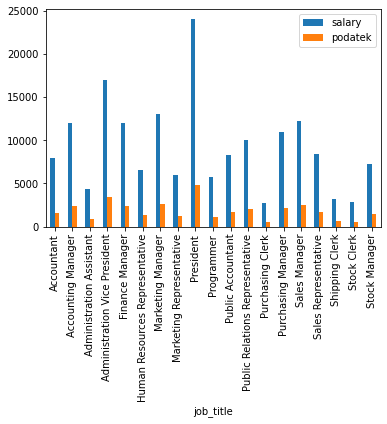

In [70]:
emps.groupby('job_title').mean().plot(kind='bar')

<AxesSubplot:xlabel='job_title'>

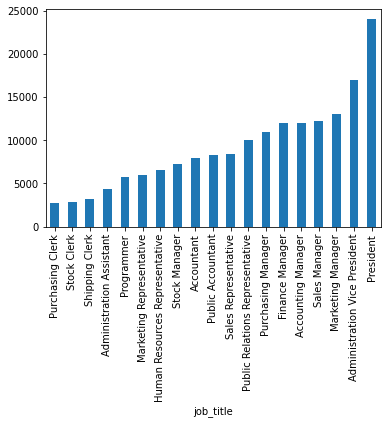

In [71]:
emps.groupby('job_title').mean().sort_values('salary').salary.plot(kind='bar')

In [72]:
agregaty = emps.groupby(['department_name', 'job_title']).agg({'last_name': 'count', 'salary': ['min', 'mean', 'max']})

In [73]:
agregaty

last_name salary  \
                                                     count    min   
department_name  job_title                                          
Accounting       Accounting Manager                      1  12000   
                 Public Accountant                       1   8300   
Administration   Administration Assistant                1   4400   
Executive        Administration Vice President           2  17000   
                 President                               1  24005   
Finance          Accountant                              5   6900   
                 Finance Manager                         1  12000   
Human Resources  Human Resources Representative          1   6500   
IT               Programmer                              5   4200   
Marketing        Marketing Manager                       1  13000   
                 Marketing Representative                1   6000   
Public Relations Public Relations Representative         1  10000   
Purchasing       Purchasing Clerk                        5   2500   
                 Purchasing Manager                      1  11000   
Sales            Sales Manager                           5  10500   
                 Sales Representative                   29   6100   
Shipping         Shipping Clerk                         20   2500   
                 Stock Clerk                            20   2100   
                 Stock Manager                           5   5800   

                                                                       
                                                          mean    max  
department_name  job_title                                             
Accounting       Accounting Manager               12000.000000  12000  
                 Public Accountant                 8300.000000   8300  
Administration   Administration Assistant          4400.000000   4400  
Executive        Administration Vice President    17000.000000  17000  
                 President                        24005.000000  24005  
Finance          Accountant                        7920.000000   9000  
                 Finance Manager                  12000.000000  12000  
Human Resources  Human Resources Representative    6500.000000   6500  
IT               Programmer                        5760.000000   9000  
Marketing        Marketing Manager                13000.000000  13000  
                 Marketing Representative          6000.000000   6000  
Public Relations Public Relations Representative  10000.000000  10000  
Purchasing       Purchasing Clerk                  2780.000000   3100  
                 Purchasing Manager               11000.000000  11000  
Sales            Sales Manager                    12200.000000  14000  
                 Sales Representative              8396.551724  11500  
Shipping         Shipping Clerk                    3215.000000   4200  
                 Stock Clerk                       2785.000000   3600  
                 Stock Manager                     7280.000000   8200

In [74]:
agregaty[('salary', 'min')]

department_name   job_title                      
Accounting        Accounting Manager                 12000
                  Public Accountant                   8300
Administration    Administration Assistant            4400
Executive         Administration Vice President      17000
                  President                          24005
Finance           Accountant                          6900
                  Finance Manager                    12000
Human Resources   Human Resources Representative      6500
IT                Programmer                          4200
Marketing         Marketing Manager                  13000
                  Marketing Representative            6000
Public Relations  Public Relations Representative    10000
Purchasing        Purchasing Clerk                    2500
                  Purchasing Manager                 11000
Sales             Sales Manager                      10500
                  Sales Representative                6100
Shippi

In [75]:
agregaty.loc[('Marketing', 'Marketing Representative')]

last_name  count       1.0
salary     min      6000.0
           mean     6000.0
           max      6000.0
Name: (Marketing, Marketing Representative), dtype: float64

In [76]:
agregaty.loc[('IT', 'Programmer'), ('salary', 'mean')]

5760.0

In [77]:
agregaty.to_csv('grupy_pracownikow.csv')

In [78]:
agregaty.to_excel('grupy.xlsx')
#agregaty.to_clipboard()

### Łączenie tabel

In [79]:
# miasta = pandas.read_csv('miasta.csv', delimiter=';')
miasta = pandas.read_csv('miasta_bez_toronto.csv', delimiter=';')
miasta2 = pandas.read_csv('miasta2.csv', delimiter=';')
miasta3 = pandas.read_csv('miasta2.csv', delimiter=';', encoding='utf-8', index_col = 'miasto')

In [80]:
miasta

city  population  elevation
0               London     8825000         11
1               Munich     1456000        520
2               Oxford      152000         61
3              Seattle      720000        158
4  South San Francisco       66000          5
5            Southlake       30000        195
6             Warszawa     2000000        100

In [81]:
miasta2

miasto  population  elevation    first_name
0              Seattle      720000        158         Sjetl
1  South San Francisco       66000          5  Sanfrancisko
2            Southlake       30000        195     Southlake
3              Toronto     2730000         76       Toronto
4               London     8825000         11         Lądek
5               Munich     1456000        520     Monachium
6               Oxford      152000         61       Oksford

In [82]:
miasta3

population  elevation    first_name
miasto                                                  
Seattle                  720000        158         Sjetl
South San Francisco       66000          5  Sanfrancisko
Southlake                 30000        195     Southlake
Toronto                 2730000         76       Toronto
London                  8825000         11         Lądek
Munich                  1456000        520     Monachium
Oxford                   152000         61       Oksford

In [83]:
# "poziome" złączanie tabel - operacja merge
# analogia do JOIN w SQL
# jeśli nie podamy kryteriów złączania - działa jak NATURAL JOIN - dopasowuje kolumny o tych samych nazwach
emps.merge(miasta)

first_name   last_name                        job_title  salary  \
0       Stefan        King                        President   24005   
1        Neena     Kochhar    Administration Vice President   17000   
2          Lex     De Haan    Administration Vice President   17000   
3        Nancy   Greenberg                  Finance Manager   12000   
4       Daniel      Faviet                       Accountant    9000   
..         ...         ...                              ...     ...   
99    Jonathon      Taylor             Sales Representative    8600   
100       Jack  Livingston             Sales Representative    8400   
101    Charles     Johnson             Sales Representative    6200   
102      Susan      Mavris   Human Resources Representative    6500   
103    Hermann        Baer  Public Relations Representative   10000   

     hire_date   department_name                                   address  \
0   1987-06-17         Executive                           2004 Charade Rd   
1   1989-09-21         Executive                           2004 Charade Rd   
2   1993-01-13         Executive                           2004 Charade Rd   
3   1994-08-17           Finance                           2004 Charade Rd   
4   1994-08-16           Finance                           2004 Charade Rd   
..         ...               ...                                       ...   
99  1998-03-24             Sales  Magdalen Centre, The Oxford Science Park   
100 1998-04-23             Sales  Magdalen Centre, The Oxford Science Park   
101 2000-01-04             Sales  Magdalen Centre, The Oxford Science Park   
102 1994-06-07   Human Resources                            8204 Arthur St   
103 1994-06-07  Public Relations                     Schwanthalerstr. 7031   

    postal_code     city                   country  podatek  status  \
0         98199  Seattle  United States of America   4801.0  bogacz   
1         98199  Seattle  United States of America   3400.0  bogacz   
2         98199  Seattle  United States of America   3400.0  bogacz   
3         98199  Seattle  United States of America   2400.0   spoko   
4         98199  Seattle  United States of America   1800.0   spoko   
..          ...      ...                       ...      ...     ...   
99      OX9 9ZB   Oxford            United Kingdom   1720.0   spoko   
100     OX9 9ZB   Oxford            United Kingdom   1680.0   spoko   
101     OX9 9ZB   Oxford            United Kingdom   1240.0   spoko   
102         NaN   London            United Kingdom   1300.0   spoko   
103       80925   Munich                   Germany   2000.0   spoko   

     population  elevation  
0        720000        158  
1        720000        158  
2        720000        158  
3        720000        158  
4        720000        158  
..          ...        ...  
99       152000         61  
100      152000         61  
101      152000         61  
102     8825000         11  
103     1456000        520  

[104 rows x 14 columns]

In [84]:
# parametr on - kolumna, po której złączamy - działa jak JOIN USING
emps.merge(miasta, on='city')

first_name   last_name                        job_title  salary  \
0       Stefan        King                        President   24005   
1        Neena     Kochhar    Administration Vice President   17000   
2          Lex     De Haan    Administration Vice President   17000   
3        Nancy   Greenberg                  Finance Manager   12000   
4       Daniel      Faviet                       Accountant    9000   
..         ...         ...                              ...     ...   
99    Jonathon      Taylor             Sales Representative    8600   
100       Jack  Livingston             Sales Representative    8400   
101    Charles     Johnson             Sales Representative    6200   
102      Susan      Mavris   Human Resources Representative    6500   
103    Hermann        Baer  Public Relations Representative   10000   

     hire_date   department_name                                   address  \
0   1987-06-17         Executive                           2004 Charade Rd   
1   1989-09-21         Executive                           2004 Charade Rd   
2   1993-01-13         Executive                           2004 Charade Rd   
3   1994-08-17           Finance                           2004 Charade Rd   
4   1994-08-16           Finance                           2004 Charade Rd   
..         ...               ...                                       ...   
99  1998-03-24             Sales  Magdalen Centre, The Oxford Science Park   
100 1998-04-23             Sales  Magdalen Centre, The Oxford Science Park   
101 2000-01-04             Sales  Magdalen Centre, The Oxford Science Park   
102 1994-06-07   Human Resources                            8204 Arthur St   
103 1994-06-07  Public Relations                     Schwanthalerstr. 7031   

    postal_code     city                   country  podatek  status  \
0         98199  Seattle  United States of America   4801.0  bogacz   
1         98199  Seattle  United States of America   3400.0  bogacz   
2         98199  Seattle  United States of America   3400.0  bogacz   
3         98199  Seattle  United States of America   2400.0   spoko   
4         98199  Seattle  United States of America   1800.0   spoko   
..          ...      ...                       ...      ...     ...   
99      OX9 9ZB   Oxford            United Kingdom   1720.0   spoko   
100     OX9 9ZB   Oxford            United Kingdom   1680.0   spoko   
101     OX9 9ZB   Oxford            United Kingdom   1240.0   spoko   
102         NaN   London            United Kingdom   1300.0   spoko   
103       80925   Munich                   Germany   2000.0   spoko   

     population  elevation  
0        720000        158  
1        720000        158  
2        720000        158  
3        720000        158  
4        720000        158  
..          ...        ...  
99       152000         61  
100      152000         61  
101      152000         61  
102     8825000         11  
103     1456000        520  

[104 rows x 14 columns]

In [85]:
# domyślnie gdy nie uda się dopasować danych, to niedopasowane rekordy w ogóle nie są wyświetlane
emps.merge(miasta, on='city')

first_name   last_name                        job_title  salary  \
0       Stefan        King                        President   24005   
1        Neena     Kochhar    Administration Vice President   17000   
2          Lex     De Haan    Administration Vice President   17000   
3        Nancy   Greenberg                  Finance Manager   12000   
4       Daniel      Faviet                       Accountant    9000   
..         ...         ...                              ...     ...   
99    Jonathon      Taylor             Sales Representative    8600   
100       Jack  Livingston             Sales Representative    8400   
101    Charles     Johnson             Sales Representative    6200   
102      Susan      Mavris   Human Resources Representative    6500   
103    Hermann        Baer  Public Relations Representative   10000   

     hire_date   department_name                                   address  \
0   1987-06-17         Executive                           2004 Charade Rd   
1   1989-09-21         Executive                           2004 Charade Rd   
2   1993-01-13         Executive                           2004 Charade Rd   
3   1994-08-17           Finance                           2004 Charade Rd   
4   1994-08-16           Finance                           2004 Charade Rd   
..         ...               ...                                       ...   
99  1998-03-24             Sales  Magdalen Centre, The Oxford Science Park   
100 1998-04-23             Sales  Magdalen Centre, The Oxford Science Park   
101 2000-01-04             Sales  Magdalen Centre, The Oxford Science Park   
102 1994-06-07   Human Resources                            8204 Arthur St   
103 1994-06-07  Public Relations                     Schwanthalerstr. 7031   

    postal_code     city                   country  podatek  status  \
0         98199  Seattle  United States of America   4801.0  bogacz   
1         98199  Seattle  United States of America   3400.0  bogacz   
2         98199  Seattle  United States of America   3400.0  bogacz   
3         98199  Seattle  United States of America   2400.0   spoko   
4         98199  Seattle  United States of America   1800.0   spoko   
..          ...      ...                       ...      ...     ...   
99      OX9 9ZB   Oxford            United Kingdom   1720.0   spoko   
100     OX9 9ZB   Oxford            United Kingdom   1680.0   spoko   
101     OX9 9ZB   Oxford            United Kingdom   1240.0   spoko   
102         NaN   London            United Kingdom   1300.0   spoko   
103       80925   Munich                   Germany   2000.0   spoko   

     population  elevation  
0        720000        158  
1        720000        158  
2        720000        158  
3        720000        158  
4        720000        158  
..          ...        ...  
99       152000         61  
100      152000         61  
101      152000         61  
102     8825000         11  
103     1456000        520  

[104 rows x 14 columns]

In [86]:
# odpowiedniki LEFT JOIN i RIGHT JOIN
# domyślnie działa jak INNER JOIN
# ta wersja wyświetli wszystkich pracowników, ale niekoniecznie wszystkie miasta
emps.merge(miasta, on='city', how='left')

first_name last_name                        job_title  salary  hire_date  \
0       Stefan      King                        President   24005 1987-06-17   
1        Neena   Kochhar    Administration Vice President   17000 1989-09-21   
2          Lex   De Haan    Administration Vice President   17000 1993-01-13   
3    Alexander    Hunold                       Programmer    9000 1990-01-03   
4        Bruce     Ernst                       Programmer    6000 1991-05-21   
..         ...       ...                              ...     ...        ...   
102        Pat       Fay         Marketing Representative    6000 1997-08-17   
103      Susan    Mavris   Human Resources Representative    6500 1994-06-07   
104    Hermann      Baer  Public Relations Representative   10000 1994-06-07   
105    Shelley   Higgins               Accounting Manager   12000 1994-06-07   
106    William     Gietz                Public Accountant    8300 1994-06-07   

      department_name                address postal_code       city  \
0           Executive        2004 Charade Rd       98199    Seattle   
1           Executive        2004 Charade Rd       98199    Seattle   
2           Executive        2004 Charade Rd       98199    Seattle   
3                  IT    2014 Jabberwocky Rd       26192  Southlake   
4                  IT    2014 Jabberwocky Rd       26192  Southlake   
..                ...                    ...         ...        ...   
102         Marketing        147 Spadina Ave     M5V 2L7    Toronto   
103   Human Resources         8204 Arthur St         NaN     London   
104  Public Relations  Schwanthalerstr. 7031       80925     Munich   
105        Accounting        2004 Charade Rd       98199    Seattle   
106        Accounting        2004 Charade Rd       98199    Seattle   

                      country  podatek  status  population  elevation  
0    United States of America   4801.0  bogacz    720000.0      158.0  
1    United States of America   3400.0  bogacz    720000.0      158.0  
2    United States of America   3400.0  bogacz    720000.0      158.0  
3    United States of America   1800.0   spoko     30000.0      195.0  
4    United States of America   1200.0   spoko     30000.0      195.0  
..                        ...      ...     ...         ...        ...  
102                    Canada   1200.0   spoko         NaN        NaN  
103            United Kingdom   1300.0   spoko   8825000.0       11.0  
104                   Germany   2000.0   spoko   1456000.0      520.0  
105  United States of America   2400.0   spoko    720000.0      158.0  
106  United States of America   1660.0   spoko    720000.0      158.0  

[107 rows x 14 columns]

In [87]:
# ta wersja wyświetli wszystkie miasta, ale może nie wyświetlić wszystkich pracowników - pominie tych, którzy nie mają określonego miasta, albo mają takie miasto, jakiego brakuje w pliku miasta.csv
# tu jest Warszawa, chociaż nie ma takiego pracownika
emps.merge(miasta, on='city', how='right')

first_name  last_name                        job_title   salary  \
0        Susan     Mavris   Human Resources Representative   6500.0   
1      Hermann       Baer  Public Relations Representative  10000.0   
2         John    Russell                    Sales Manager  14000.0   
3        Karen   Partners                    Sales Manager  13500.0   
4      Alberto  Errazuriz                    Sales Manager  12000.0   
..         ...        ...                              ...      ...   
100      Bruce      Ernst                       Programmer   6000.0   
101      David     Austin                       Programmer   4800.0   
102      Valli  Pataballa                       Programmer   4800.0   
103      Diana    Lorentz                       Programmer   4200.0   
104        NaN        NaN                              NaN      NaN   

     hire_date   department_name                                   address  \
0   1994-06-07   Human Resources                            8204 Arthur St   
1   1994-06-07  Public Relations                     Schwanthalerstr. 7031   
2   1996-10-01             Sales  Magdalen Centre, The Oxford Science Park   
3   1997-01-05             Sales  Magdalen Centre, The Oxford Science Park   
4   1997-03-10             Sales  Magdalen Centre, The Oxford Science Park   
..         ...               ...                                       ...   
100 1991-05-21                IT                       2014 Jabberwocky Rd   
101 1997-06-25                IT                       2014 Jabberwocky Rd   
102 1998-02-05                IT                       2014 Jabberwocky Rd   
103 1999-02-07                IT                       2014 Jabberwocky Rd   
104        NaT               NaN                                       NaN   

    postal_code       city                   country  podatek  status  \
0           NaN     London            United Kingdom   1300.0   spoko   
1         80925     Munich                   Germany   2000.0   spoko   
2       OX9 9ZB     Oxford            United Kingdom   2800.0   spoko   
3       OX9 9ZB     Oxford            United Kingdom   2700.0   spoko   
4       OX9 9ZB     Oxford            United Kingdom   2400.0   spoko   
..          ...        ...                       ...      ...     ...   
100       26192  Southlake  United States of America   1200.0   spoko   
101       26192  Southlake  United States of America    960.0  biedny   
102       26192  Southlake  United States of America    960.0  biedny   
103       26192  Southlake  United States of America    840.0  biedny   
104         NaN   Warszawa                       NaN      NaN     NaN   

     population  elevation  
0       8825000         11  
1       1456000        520  
2        152000         61  
3        152000         61  
4        152000         61  
..          ...        ...  
100       30000        195  
101       30000        195  
102       30000        195  
103       30000        195  
104     2000000        100  

[105 rows x 14 columns]

In [88]:
# jeśli kolumny mają różne nazwy:
emps.merge(miasta2, left_on='city', right_on='miasto')

first_name_x  last_name                        job_title  salary  \
0         Stefan       King                        President   24005   
1          Neena    Kochhar    Administration Vice President   17000   
2            Lex    De Haan    Administration Vice President   17000   
3          Nancy  Greenberg                  Finance Manager   12000   
4         Daniel     Faviet                       Accountant    9000   
..           ...        ...                              ...     ...   
101      Charles    Johnson             Sales Representative    6200   
102      Michael  Hartstein                Marketing Manager   13000   
103          Pat        Fay         Marketing Representative    6000   
104        Susan     Mavris   Human Resources Representative    6500   
105      Hermann       Baer  Public Relations Representative   10000   

     hire_date   department_name                                   address  \
0   1987-06-17         Executive                           2004 Charade Rd   
1   1989-09-21         Executive                           2004 Charade Rd   
2   1993-01-13         Executive                           2004 Charade Rd   
3   1994-08-17           Finance                           2004 Charade Rd   
4   1994-08-16           Finance                           2004 Charade Rd   
..         ...               ...                                       ...   
101 2000-01-04             Sales  Magdalen Centre, The Oxford Science Park   
102 1996-02-17         Marketing                           147 Spadina Ave   
103 1997-08-17         Marketing                           147 Spadina Ave   
104 1994-06-07   Human Resources                            8204 Arthur St   
105 1994-06-07  Public Relations                     Schwanthalerstr. 7031   

    postal_code     city                   country  podatek  status   miasto  \
0         98199  Seattle  United States of America   4801.0  bogacz  Seattle   
1         98199  Seattle  United States of America   3400.0  bogacz  Seattle   
2         98199  Seattle  United States of America   3400.0  bogacz  Seattle   
3         98199  Seattle  United States of America   2400.0   spoko  Seattle   
4         98199  Seattle  United States of America   1800.0   spoko  Seattle   
..          ...      ...                       ...      ...     ...      ...   
101     OX9 9ZB   Oxford            United Kingdom   1240.0   spoko   Oxford   
102     M5V 2L7  Toronto                    Canada   2600.0   spoko  Toronto   
103     M5V 2L7  Toronto                    Canada   1200.0   spoko  Toronto   
104         NaN   London            United Kingdom   1300.0   spoko   London   
105       80925   Munich                   Germany   2000.0   spoko   Munich   

     population  elevation first_name_y  
0        720000        158        Sjetl  
1        720000        158        Sjetl  
2        720000        158        Sjetl  
3        720000        158        Sjetl  
4        720000        158        Sjetl  
..          ...        ...          ...  
101      152000         61      Oksford  
102     2730000         76      Toronto  
103     2730000         76      Toronto  
104     8825000         11        Lądek  
105     1456000        520    Monachium  

[106 rows x 16 columns]

In [89]:
# jeśli kolumna jest indeksem zamiast right_on (left_on) piszemy right_index=True (lub left_index):
emps.merge(miasta3, left_on='city', right_index=True)

first_name_x  last_name                        job_title  salary  \
employee_id                                                                    
100               Stefan       King                        President   24005   
101                Neena    Kochhar    Administration Vice President   17000   
102                  Lex    De Haan    Administration Vice President   17000   
108                Nancy  Greenberg                  Finance Manager   12000   
109               Daniel     Faviet                       Accountant    9000   
...                  ...        ...                              ...     ...   
179              Charles    Johnson             Sales Representative    6200   
201              Michael  Hartstein                Marketing Manager   13000   
202                  Pat        Fay         Marketing Representative    6000   
203                Susan     Mavris   Human Resources Representative    6500   
204              Hermann       Baer  Public Relations Representative   10000   

             hire_date   department_name  \
employee_id                                
100         1987-06-17         Executive   
101         1989-09-21         Executive   
102         1993-01-13         Executive   
108         1994-08-17           Finance   
109         1994-08-16           Finance   
...                ...               ...   
179         2000-01-04             Sales   
201         1996-02-17         Marketing   
202         1997-08-17         Marketing   
203         1994-06-07   Human Resources   
204         1994-06-07  Public Relations   

                                              address postal_code     city  \
employee_id                                                                  
100                                   2004 Charade Rd       98199  Seattle   
101                                   2004 Charade Rd       98199  Seattle   
102                                   2004 Charade Rd       98199  Seattle   
108                                   2004 Charade Rd       98199  Seattle   
109                                   2004 Charade Rd       98199  Seattle   
...                                               ...         ...      ...   
179          Magdalen Centre, The Oxford Science Park     OX9 9ZB   Oxford   
201                                   147 Spadina Ave     M5V 2L7  Toronto   
202                                   147 Spadina Ave     M5V 2L7  Toronto   
203                                    8204 Arthur St         NaN   London   
204                             Schwanthalerstr. 7031       80925   Munich   

                              country  podatek  status  population  elevation  \
employee_id                                                                     
100          United States of America   4801.0  bogacz      720000        158   
101          United States of America   3400.0  bogacz      720000        158   
102          United States of America   3400.0  bogacz      720000        158   
108          United States of America   2400.0   spoko      720000        158   
109          United States of America   1800.0   spoko      720000        158   
...                               ...      ...     ...         ...        ...   
179                    United Kingdom   1240.0   spoko      152000         61   
201                            Canada   2600.0   spoko     2730000         76   
202                            Canada   1200.0   spoko     2730000         76   
203                    United Kingdom   1300.0   spoko     8825000         11   
204                           Germany   2000.0   spoko     1456000        520   

            first_name_y  
employee_id               
100                Sjetl  
101                Sjetl  
102                Sjetl  
108                Sjetl  
109                Sjetl  
...                  ...  
179              Oksford  
201              Toronto  
202              Toronto  
203                Lądek  
204  

In [90]:
# możliwość podania własnych prefiksów, które zostaną dodane do kolumn z róznych tabel
emps.merge(miasta3, left_on='city', right_index=True, suffixes=['_emp', '_m'])

first_name_emp  last_name                        job_title  \
employee_id                                                              
100                 Stefan       King                        President   
101                  Neena    Kochhar    Administration Vice President   
102                    Lex    De Haan    Administration Vice President   
108                  Nancy  Greenberg                  Finance Manager   
109                 Daniel     Faviet                       Accountant   
...                    ...        ...                              ...   
179                Charles    Johnson             Sales Representative   
201                Michael  Hartstein                Marketing Manager   
202                    Pat        Fay         Marketing Representative   
203                  Susan     Mavris   Human Resources Representative   
204                Hermann       Baer  Public Relations Representative   

             salary  hire_date   department_name  \
employee_id                                        
100           24005 1987-06-17         Executive   
101           17000 1989-09-21         Executive   
102           17000 1993-01-13         Executive   
108           12000 1994-08-17           Finance   
109            9000 1994-08-16           Finance   
...             ...        ...               ...   
179            6200 2000-01-04             Sales   
201           13000 1996-02-17         Marketing   
202            6000 1997-08-17         Marketing   
203            6500 1994-06-07   Human Resources   
204           10000 1994-06-07  Public Relations   

                                              address postal_code     city  \
employee_id                                                                  
100                                   2004 Charade Rd       98199  Seattle   
101                                   2004 Charade Rd       98199  Seattle   
102                                   2004 Charade Rd       98199  Seattle   
108                                   2004 Charade Rd       98199  Seattle   
109                                   2004 Charade Rd       98199  Seattle   
...                                               ...         ...      ...   
179          Magdalen Centre, The Oxford Science Park     OX9 9ZB   Oxford   
201                                   147 Spadina Ave     M5V 2L7  Toronto   
202                                   147 Spadina Ave     M5V 2L7  Toronto   
203                                    8204 Arthur St         NaN   London   
204                             Schwanthalerstr. 7031       80925   Munich   

                              country  podatek  status  population  elevation  \
employee_id                                                                     
100          United States of America   4801.0  bogacz      720000        158   
101          United States of America   3400.0  bogacz      720000        158   
102          United States of America   3400.0  bogacz      720000        158   
108          United States of America   2400.0   spoko      720000        158   
109          United States of America   1800.0   spoko      720000        158   
...                               ...      ...     ...         ...        ...   
179                    United Kingdom   1240.0   spoko      152000         61   
201                            Canada   2600.0   spoko     2730000         76   
202                            Canada   1200.0   spoko     2730000         76   
203                    United Kingdom   1300.0   spoko     8825000         11   
204                           Germany   2000.0   spoko     1456000        520   

            first_name_m  
employee_id               
100                Sjetl  
101                Sjetl  
102                Sjetl  
108                Sjetl  
109                Sjetl  
...                  ...  
179              Oksford  
201              Toronto  
202              Toronto  
203   

In [91]:
emps.merge(miasta2, left_on='city', right_on='miasto', suffixes=['_emp', '_m'])

first_name_emp  last_name                        job_title  salary  \
0           Stefan       King                        President   24005   
1            Neena    Kochhar    Administration Vice President   17000   
2              Lex    De Haan    Administration Vice President   17000   
3            Nancy  Greenberg                  Finance Manager   12000   
4           Daniel     Faviet                       Accountant    9000   
..             ...        ...                              ...     ...   
101        Charles    Johnson             Sales Representative    6200   
102        Michael  Hartstein                Marketing Manager   13000   
103            Pat        Fay         Marketing Representative    6000   
104          Susan     Mavris   Human Resources Representative    6500   
105        Hermann       Baer  Public Relations Representative   10000   

     hire_date   department_name                                   address  \
0   1987-06-17         Executive                           2004 Charade Rd   
1   1989-09-21         Executive                           2004 Charade Rd   
2   1993-01-13         Executive                           2004 Charade Rd   
3   1994-08-17           Finance                           2004 Charade Rd   
4   1994-08-16           Finance                           2004 Charade Rd   
..         ...               ...                                       ...   
101 2000-01-04             Sales  Magdalen Centre, The Oxford Science Park   
102 1996-02-17         Marketing                           147 Spadina Ave   
103 1997-08-17         Marketing                           147 Spadina Ave   
104 1994-06-07   Human Resources                            8204 Arthur St   
105 1994-06-07  Public Relations                     Schwanthalerstr. 7031   

    postal_code     city                   country  podatek  status   miasto  \
0         98199  Seattle  United States of America   4801.0  bogacz  Seattle   
1         98199  Seattle  United States of America   3400.0  bogacz  Seattle   
2         98199  Seattle  United States of America   3400.0  bogacz  Seattle   
3         98199  Seattle  United States of America   2400.0   spoko  Seattle   
4         98199  Seattle  United States of America   1800.0   spoko  Seattle   
..          ...      ...                       ...      ...     ...      ...   
101     OX9 9ZB   Oxford            United Kingdom   1240.0   spoko   Oxford   
102     M5V 2L7  Toronto                    Canada   2600.0   spoko  Toronto   
103     M5V 2L7  Toronto                    Canada   1200.0   spoko  Toronto   
104         NaN   London            United Kingdom   1300.0   spoko   London   
105       80925   Munich                   Germany   2000.0   spoko   Munich   

     population  elevation first_name_m  
0        720000        158        Sjetl  
1        720000        158        Sjetl  
2        720000        158        Sjetl  
3        720000        158        Sjetl  
4        720000        158        Sjetl  
..          ...        ...          ...  
101      152000         61      Oksford  
102     2730000         76      Toronto  
103     2730000         76      Toronto  
104     8825000         11        Lądek  
105     1456000        520    Monachium  

[106 rows x 16 columns]

In [92]:
df1 = pandas.DataFrame([('Ala', 'k', 20),
                    ('Ola', 'k', 30),
                    ('Tomek', 'm', 40),
                    ('Wiktor', 'm', 50)])
df2 = pandas.DataFrame([('Ewelina', 'k', 20),
                    ('Małgorzata', 'k', 30),
                    ('Patryk', 'm', 40),
                    ('Andrzej', 'm', 50)])

In [93]:
# Łączenie jednego pod drugim - jak UNION w SQL
razem = pandas.concat([df1, df2])
razem

0  1   2
0         Ala  k  20
1         Ola  k  30
2       Tomek  m  40
3      Wiktor  m  50
0     Ewelina  k  20
1  Małgorzata  k  30
2      Patryk  m  40
3     Andrzej  m  50

In [94]:
# Ale można także zmienić oś wzdłuż której dodajemy - teraz będą obok siebie
razem2 = pandas.concat([df1, df2], axis=1)
razem2

0  1   2           0  1   2
0     Ala  k  20     Ewelina  k  20
1     Ola  k  30  Małgorzata  k  30
2   Tomek  m  40      Patryk  m  40
3  Wiktor  m  50     Andrzej  m  50

In [95]:
razem3 = pandas.merge(df1, df2, on=2)
razem3

0_x 1_x   2         0_y 1_y
0     Ala   k  20     Ewelina   k
1     Ola   k  30  Małgorzata   k
2   Tomek   m  40      Patryk   m
3  Wiktor   m  50     Andrzej   m

In [96]:
pandas.concat([miasta, miasta2], axis=1, sort=False)

city  population  elevation               miasto  \
0               London     8825000         11              Seattle   
1               Munich     1456000        520  South San Francisco   
2               Oxford      152000         61            Southlake   
3              Seattle      720000        158              Toronto   
4  South San Francisco       66000          5               London   
5            Southlake       30000        195               Munich   
6             Warszawa     2000000        100               Oxford   

   population  elevation    first_name  
0      720000        158         Sjetl  
1       66000          5  Sanfrancisko  
2       30000        195     Southlake  
3     2730000         76       Toronto  
4     8825000         11         Lądek  
5     1456000        520     Monachium  
6      152000         61       Oksford

In [97]:
grupy = emps.groupby('city').agg({'salary' : ['count', 'mean']})
grupy

salary              
                     count          mean
city                                    
London                   1   6500.000000
Munich                   1  10000.000000
Oxford                  34   8955.882353
Seattle                 18   8844.722222
South San Francisco     45   3475.555556
Southlake                5   5760.000000
Toronto                  2   9500.000000

In [98]:
pandas.merge(emps, miasta, on='city', suffixes=['_emp', '_m']).groupby(['city', 'population']).agg({'salary' : ['count', 'mean']})

salary              
                                count          mean
city                population                     
London              8825000         1   6500.000000
Munich              1456000         1  10000.000000
Oxford              152000         34   8955.882353
Seattle             720000         18   8844.722222
South San Francisco 66000          45   3475.555556
Southlake           30000           5   5760.000000